In [697]:
# Setting up the notebook.
import importlib
import helper_functions
importlib.reload(helper_functions)
from helper_functions import *

# Notebook Title: Exploring a Dataset with Regression

## Introduction
Welcome to Exercise 1! In this notebook, we will go through the importance of applying statistical concepts to our data problems and how to get meaningful answers to our questions using the power of programming. This module will help you understand many things about your data.

In the world of statistics, we use a tool called **regression** to help us answer such questions. Regression is a method used to find how one thing (like temperature) can predict another thing (like ice cream sales).

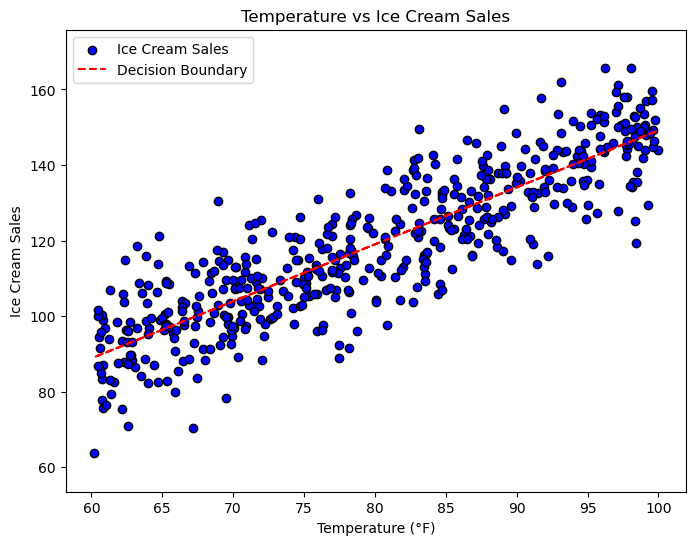

In [698]:
plot_temperature_vs_ice_cream_sales()

We can also use regression to classify things, like determining if a student will pass or fail an exam based on their study hours and sleep hours. If you look at the graph below, you can see that the blue line separates the data points. If you fall on the left side of the line, there is a good chance you will fail, and if you land on the right side of the line, there is a good chance you will pass!

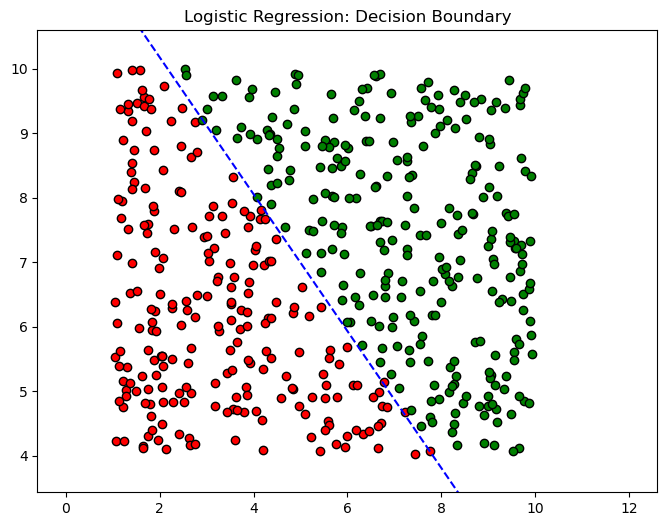

In [699]:
sleep_and_study()

Being able to find patterns in your data and learning from it is powerful. Yes, ice cream sales and exam results may be low stakes, but regression can be used in more critical environments.

Imagine you have a big source of cancer data at your disposal. You want to see if there is a pattern among them to better aid future patients. This is a big deal, as it allows you to better take care of patients and essentially buy more time by intervening sooner.

Wouldn't it be nice to answer some key questions? For example, how big does a tumor have to be, to be considered cancerous? How smooth or rough must the texture be for it to be cancerous? 

In this exercise, we will go through breast cancer data to answer our questions.

## Step 1: Loading the Dataset
In this notebook, we will explore the Breast Cancer dataset, use a Regression method to classify data, and evaluate the model's performance. 

First, we load the Breast Cancer dataset using the `load_breast_cancer()` function from the scikit-learn library. This dataset is a well-known collection of breast cancer data that includes various measurements and features related to tumor characteristics.

In [700]:
# Load the Breast Cancer dataset
breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

# Convert the dataset into a DataFrame for visualization
df = pd.DataFrame(data=np.c_[X, y], columns=np.append(breast_cancer.feature_names, 'target'))

The data is loaded into variables `X` for the measurements and `y` for the target labels (cancerous or not cancerous). For easier visualization and manipulation, we convert the dataset into a Pandas DataFrame, combining the measurements and target labels into one structured table.

## Step 2: Exploring the Dataset
Next, let's take a quick look at the dataset to understand its structure and contents.

In [701]:
# Let's look at the data
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0


Each row in the table you created represents an individual sample (or patient) from the breast cancer dataset. The columns correspond to various features measured or calculated for that sample, except for the last column labeled “target,” which indicates the classification of the sample (0 indicates a benign tumor, which is not cancerous, and 1 indicates a malignant tumor, which is cancerous.)

In [702]:
# Display the summary statistics of the dataset
print(df.describe())

       mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%      

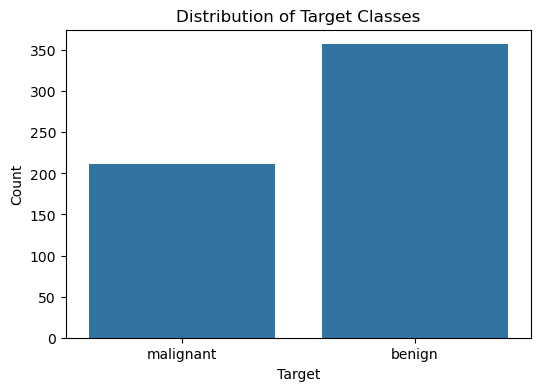

In [703]:
plot_distribution(data=df, 
                  x='target', 
                  title='Distribution of Target Classes', 
                  xlabel='Target', 
                  ylabel='Count', 
                  xticks_labels=breast_cancer.target_names)

The Breast Cancer dataset includes a large number of measurements related to tumor characteristics, making it challenging to visualize all of them at once. 

To simplify our task and create a clear visualization, we decided to use the first two columns in the dataset: _"average radius"_ and _"average texture"_. This choice is made for convenience, allowing us to quickly build and visualize our model. Focusing on just these two measurements makes the visualization clearer and more interpretable while still providing meaningful insights.

So with that in mind lets draw a scatter plot of our data to see things better. 

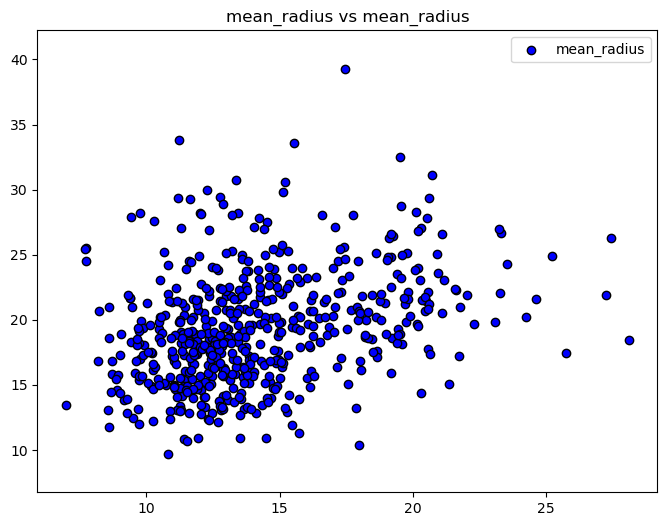

In [704]:
scatter_plot_two_features(X, "mean_radius", "mean_radius")

By using the benign and malignant labels to color each data point, we can see how average radius and average texture (or mean radius and mean texture) affect (or don't affect) the classification.

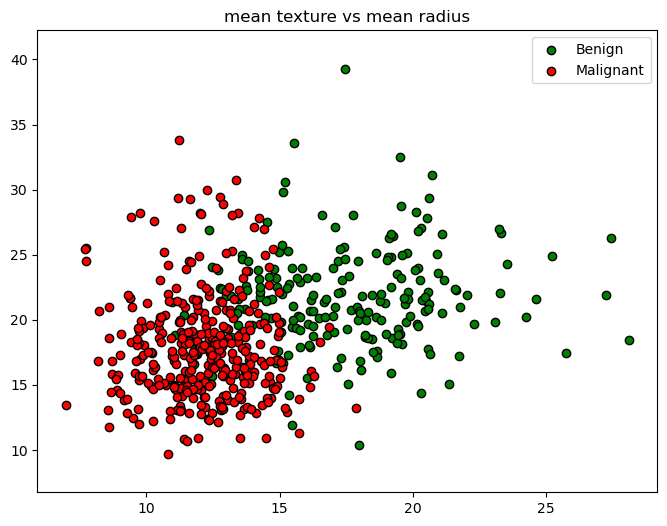

In [705]:
scatter_plot_with_class_labels(X, y, "mean radius", "mean texture")

Now that we can see our data visually, we notice that there may be a way to classify the benign and malignant cases based on mean radius and mean texture. As humans, we can visually observe potential patterns in the data points. To formalize this observation, we will use regression as a tool to help us classify these cases. The next step is to split the dataset into training and testing sets.

## Step 3: Splitting the Dataset
Now, we will split the dataset into **training** and **testing** sets for model training and evaluation. This is important because it allows us to train the model on one part of the data and test it on another part to see how well it performs on new data. This helps us understand the model's ability to make accurate predictions on data it hasn't seen before. We will learn more about this process and its significance later on in the module.

In our example today, we will use 80% of the data for training and 20% for testing.

In [706]:
try:
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # random_state=42 ensures the split is reproducible, meaning the data is split the same way each time the code is run
    
    print("Dataset split was successful")
except Exception as e:
    print(f"An error occurred: {e}")

Dataset split was successful


## Step 4: Building and Training a Classification Model
Next, we will build and train a regression model for breast cancer classification. Specifically, we will use a **logistic regression** model that classifies the data.



In [707]:
try:
    # Initialize the logistic regression model
    model = LogisticRegression(max_iter=10000)  # Try up to 10,000 times to find the best fit

    # Select specific variables (mean radius and mean texture) for training
    X_train_selected = X_train[:, [0, 1]]  # Columns 0 and 1 correspond to mean radius and mean texture

    # Train the model on the selected variables of the training data
    model.fit(X_train_selected, y_train)
    
    print("Model training was successful")
except Exception as e:
    print(f"An error occurred: {e}")

Model training was successful


Now, if everything went well, we should have successfully initialized and trained our logistic regression model using the selected variables (mean radius and mean texture). The model has learned from the training data and is now ready to make predictions. In the next step, we will evaluate the performance of our model to see how well it can classify new data points.

## Step 5: Evaluating the Model
Now, let's evaluate the performance of the trained model on the testing data.

We will use the `model.predict` method to make predictions on the testing data. This method takes the testing data as input and outputs the predicted classifications for each data point.

In [708]:
try:
    # Make a prediction
    y_pred = model.predict(X_train_selected)
    
    print("Prediction made successfully, results are in y_pred")
except Exception as e:
    print(f"An error occurred: {e}")

Prediction made successfully, results are in y_pred


We will evaluate it using something called a **confusion matrix**. A confusion matrix allows us to see how well our model is performing by comparing the predicted classifications to the actual classifications. 

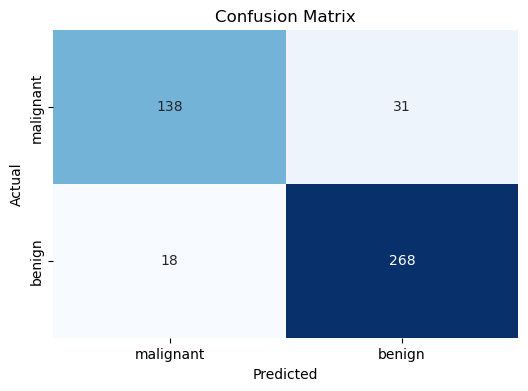

In [709]:
# Calculate the confusion matrix
cm = confusion_matrix(y_train, y_pred)

# Visualize the confusion matrix
plot_confusion_matrix(cm, breast_cancer)

We will also calculate its **accuracy** and generate a **classification report**.

First, we calculate the accuracy of the model using the `accuracy_score` function. This function compares the true labels (`y_train`) with the predicted labels (`y_pred`) and returns the percentage of correct predictions. The accuracy score provides a simple metric to understand how often the model makes correct predictions.

In [710]:
# Calculate model Accuracy
accuracy = accuracy_score(y_train, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8923076923076924


Next, we generate a classification report using the `print_classification_report` function. This report provides a more detailed evaluation of the model, including precision, recall, and F1-score for each class. These metrics help us understand the performance of the model beyond just accuracy, giving insight into how well the model identifies each class. You don’t need to know the details of these metrics right now, but it’s good to be aware of them. They may come in handy down the road, so consider reading more about them when you have time.

In [711]:
# Generate a classification report
the_report = classification_report(y_train, y_pred, target_names=breast_cancer.target_names)
print(the_report)

              precision    recall  f1-score   support

   malignant       0.88      0.82      0.85       169
      benign       0.90      0.94      0.92       286

    accuracy                           0.89       455
   macro avg       0.89      0.88      0.88       455
weighted avg       0.89      0.89      0.89       455



## Step 6: Visualizing the Decision Boundary

Now that we see the accuracy is satisfactory, we will take the next step to visualize our model on the graph. By plotting the decision boundary of the logistic regression model, we can better understand how the model classifies the data points and observe the separation between benign and malignant cases. This visualization will help us **see** the effectiveness of our model in distinguishing between the two classes.

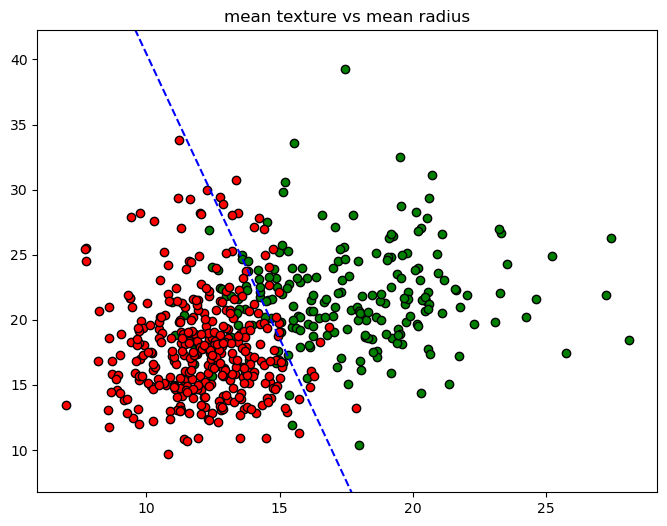

In [712]:
# Plot the decision boundary along with the color-coded data points
scatter_plot_with_decision_boundary(X, y, model, "mean radius", "mean texture")

We can see why the accuracy wasn't 100% by looking at the graph. The data points are not perfectly separable by a linear line, indicating that there is some overlap between the benign and malignant cases. This overlap means that a simple linear model will never be able to achieve 100% accuracy with this dataset. The complexity and nature of the data make it challenging for a linear boundary to perfectly classify all instances.

What if we repeat all of the steps above **using different columns**? The following Python cell will randomly select two columns and run logistic regression on them to classify the data. Each time you run the cell, it will select different columns for the classification, and you will observe that the accuracy changes accordingly. This is because different variables have varying degrees of correlation with the target variable, impacting the model's performance.

run the cell below many times...

Accuracy on test set: 0.9210526315789473


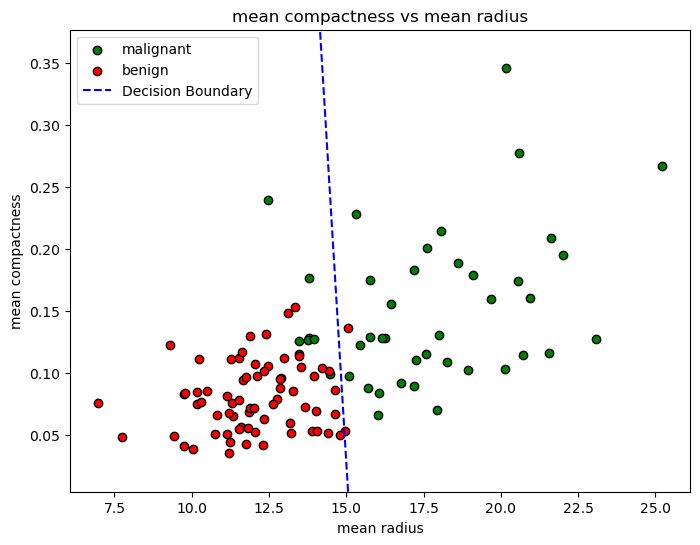

The graph plots "mean radius" on the x-axis and "mean compactness" on the y-axis.
	"mean radius": Average distance from the center to the outer edge of the tumor. (x-axis)
	"mean compactness": A measure of how tightly the tumor cells are packed together, averaged over several observations. (y-axis).

The yellow points 🟢 represent "benign tumors", and the purple points 🔴 represent "malignant tumors".
The red dashed line represents the decision boundary determined by the logistic regression model.

Each run of this script might result in different features being selected, hence different visualizations and boundaries.



In [713]:
#  running all of it again, but this time with different columns
run_it_all_over()

Circling back to the real-world application of our work, this model has the potential to save lives. By using past data to train the model, we can now quickly and accurately classify new patients as having benign or malignant tumors based on their data. This means that if a new patient's data falls on one side of the decision boundary, with the accuracy of the model in mind, we can quickly determine their diagnosis and take appropriate action. This ability to rapidly and accurately diagnose breast cancer can lead to earlier interventions, better treatment plans, and ultimately, improved patient outcomes.

run the cell below many times...

Accuracy: 0.8333333333333334


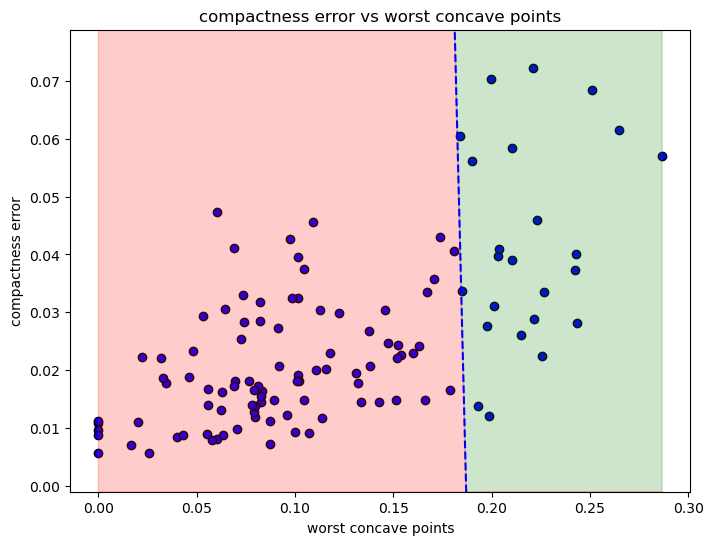

In [714]:
# how it will look like in real life...
help_me_in_real_life()

## Conclusion

Regression is a method for modeling the relationship between a dependent variable and one or more independent variables. By leveraging past data, regression helps us find patterns and make predictions about future outcomes.

With the power of programming, regression becomes an even more potent tool in the hands of data scientists. It allows us to automate the analysis of large datasets, quickly build models, and visualize complex relationships. This enables us to gain insights and make data-driven decisions more efficiently.

However, there is always room for improvement. While our current model uses a simple logistic regression approach, we can explore more advanced techniques. For instance, we can use polynomial regression to fit curves rather than straight lines, or employ regularization methods to enhance model performance, you don't need to know what these methods are now, but they open doors for future exploration. Additionally, there are many ways to refine the models we've created, such as incorporating more variables, and using cross-validation to ensure robustness.

As we continue to learn and apply these advanced techniques, we can build more accurate and reliable models, ultimately leading to better predictions and more informed decisions in various fields, including healthcare, finance, and beyond.
